# Exercises

These exercises are a mix of Python and pandas/EDA practice. Most should be no more than a few lines of code! 

In [3]:
# here is a Python list:

a = [1, 2, 3, 4, 5, 6]

# get a list containing the last 3 elements of a

b = a[-3:]

# reverse the list

b.reverse()

# get a list where each entry in a is squared (so the new list is [1, 4, 9, 16, 25, 36])

c = [item**2 for item in a]

In [12]:
# create a numpy array from this list
import numpy as np
b = np.array(a)

In [13]:
# find the mean of b
mean = np.mean(b)

In [15]:
# get a list where each entry in b is squared (so the new numpy array is [1, 4, 9, 16, 25, 36])
# use a different (numpy-specific) approach
np.square(b)

array([1, 2, 3, 4, 5, 6])

In [17]:
# change b from a length-6 list to a 2x3 matrix
b = np.resize(b, (2,3))
b

array([[1, 2, 3],
       [4, 5, 6]])

In [19]:
# find the mean value of each row
np.mean(b, axis=1)

array([2., 5.])

In [20]:
# find the mean value of each column
np.mean(b, axis=0)

array([2.5, 3.5, 4.5])

In [22]:
# find the third column of b
b[:, 2]

array([3, 6])

In [28]:
# load in the "starbucks_clean.csv" dataset
import pandas as pd
df = pd.read_csv('../data/starbucks.csv')
df

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,NaN,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,NaN,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,NaN,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,NaN,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,NaN,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,3.2,0.4,0.0,0,250,67,1,64,5.0,6%,8%,20%,10%,0
238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6%,0%,10%,NaN,0
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6%,0%,10%,NaN,0
240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4%,0%,10%,6%,0


In [29]:
# this is nutritional info for starbucks items
# let's see if we can answer some questions

# what is the average # calories across all items?
np.mean(df['Calories'])


193.87190082644628

In [30]:
# how many different categories of beverages are there?
df.Beverage_category.nunique()

9

In [32]:
# what is the average # calories for each beverage category?
cats = df.groupby("Beverage_category")
cats['Calories'].mean()

Beverage_category
Classic Espresso Drinks              140.172414
Coffee                                 4.250000
Frappuccino® Blended Coffee          276.944444
Frappuccino® Blended Crème           233.076923
Frappuccino® Light Blended Coffee    162.500000
Shaken Iced Beverages                114.444444
Signature Espresso Drinks            250.000000
Smoothies                            282.222222
Tazo® Tea Drinks                     177.307692
Name: Calories, dtype: float64

In [74]:
# what beverage preparation includes the most sugar on average?
preps = df.groupby('Beverage_prep').agg({'Sugars (g)': 'mean'})
preps.iloc[preps['Sugars (g)'].argmax()].name

'Whole Milk'

In [50]:
# what is the average % daily value calcium content for each beverage?
df[['Beverage', 'Calcium (% DV)']]

,Beverage,Calcium (% DV)
0,Brewed Coffee,0%
1,Brewed Coffee,0%
2,Brewed Coffee,0%
3,Brewed Coffee,2%
4,Caffè Latte,20%
...,...,...
237,Strawberries & Crème (Without Whipped Cream),20%
238,Vanilla Bean (Without Whipped Cream),10%
239,Vanilla Bean (Without Whipped Cream),10%
240,Vanilla Bean (Without Whipped Cream),10%


In [60]:
# It's bulking season. What drink should Naitian get so that he maximizes protein but minimizes calories?
# (you can use more than one line for this one)
# there are multiple valid approaches you can take for this (with different answers)
# I know that you want more calories for bulking season but whatever this is MDST, not Michigan Muscle Club okay
df['score'] = df['Protein (g)'].rank(method='max') - df['Calories'].rank(method='max')
df.iloc[df['score'].argmax()].Beverage

'Caffè Latte'

<AxesSubplot:ylabel='Frequency'>

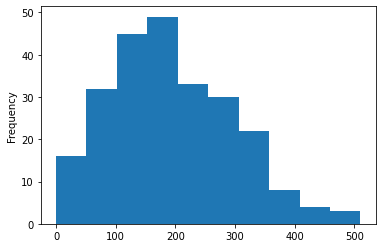

In [61]:
# plot the distribution of the number of calories in drinks using matplotlib
import matplotlib.pyplot as plt
df['Calories'].plot.hist()

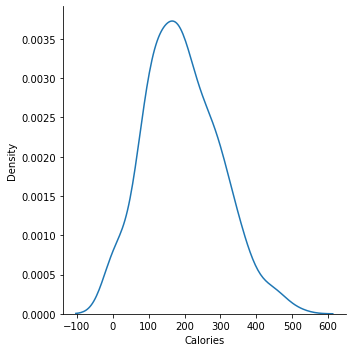

In [64]:
# plot the same distribution using seaborn. what about a density plot instead?
import seaborn as sns
sns.displot(data=df, x='Calories', kind='kde')

<AxesSubplot:xlabel='Calories', ylabel='Total Fat (g)'>

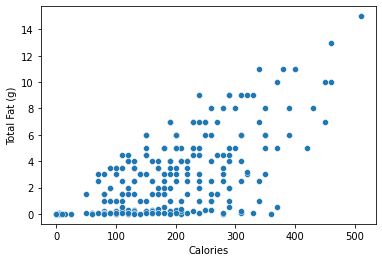

In [65]:
# plot calories against total fat using seaborn
sns.scatterplot(data=df, x='Calories', y='Total Fat (g)')

/mnt/c/Users/camtr/Documents/UMich/Extracurricular/MDST/mdst_tutorials/env/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


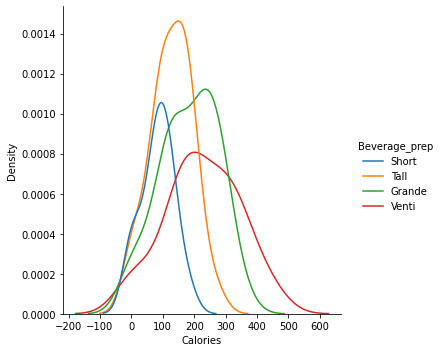

In [86]:
# plot the distribution of calories in Short, Tall, Grande, and Venti drinks
# (you can use multiple lines for this)
# twist: you should also include the Nonfat Milk drinks that also have an associated size.

# you can decide how you want to visualize this. Colors? Small multiples? Density vs histogram?
# the starbucks is your oyster.

preps_df = df[df.Beverage_prep.str.contains('Short|Tall|Grande|Venti')]

types = ['Short', 'Tall', 'Grande', 'Venti']
for type in types:
    preps_df.loc[preps_df['Beverage_prep'].str.contains(type), 'Beverage_prep'] = type

sns.displot(data=preps_df, x='Calories', kind='kde', hue='Beverage_prep')